In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sqldf


In [2]:
#Defining the Path
file_path = r'D:\Kaggle Dataset Findings\train\train.csv'

In [3]:
#Reading the Data
df = pd.read_csv(file_path,nrows=500000)


Bad key text.latex.preview in file C:\Users\Beast\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Beast\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Beast\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

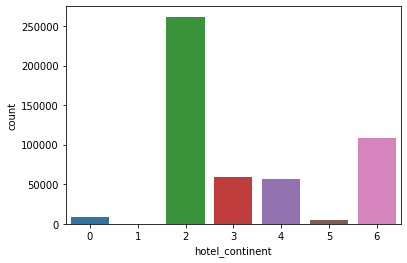

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='hotel_continent', data=df)

<AxesSubplot:>

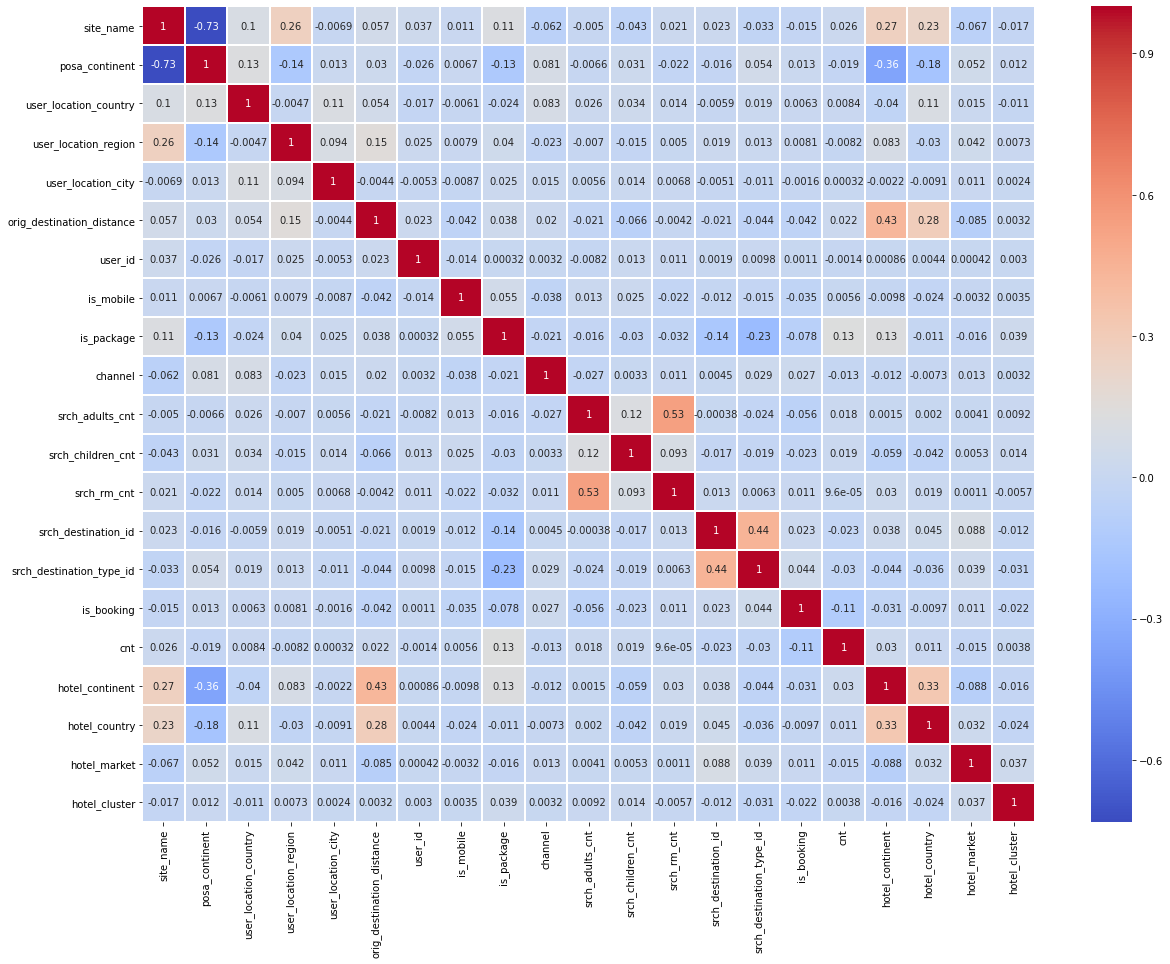

In [5]:
fig, ax=plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

<AxesSubplot:xlabel='hotel_cluster', ylabel='count'>

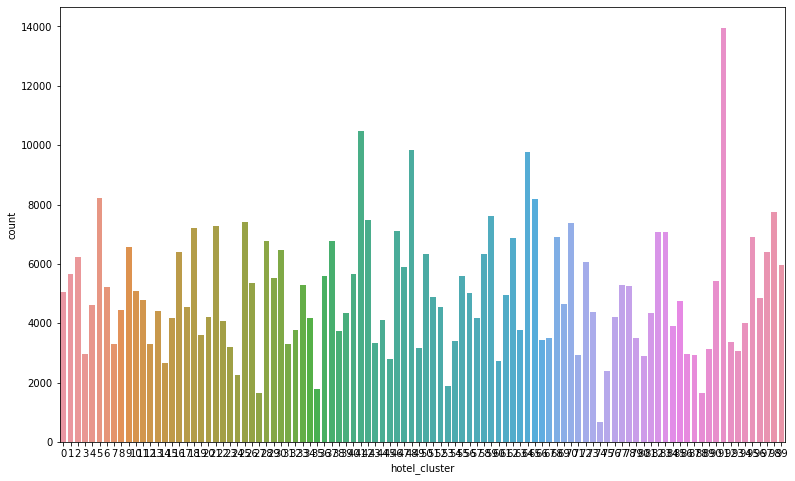

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='hotel_cluster',data=df, ax=ax)

<AxesSubplot:xlabel='is_package', ylabel='count'>

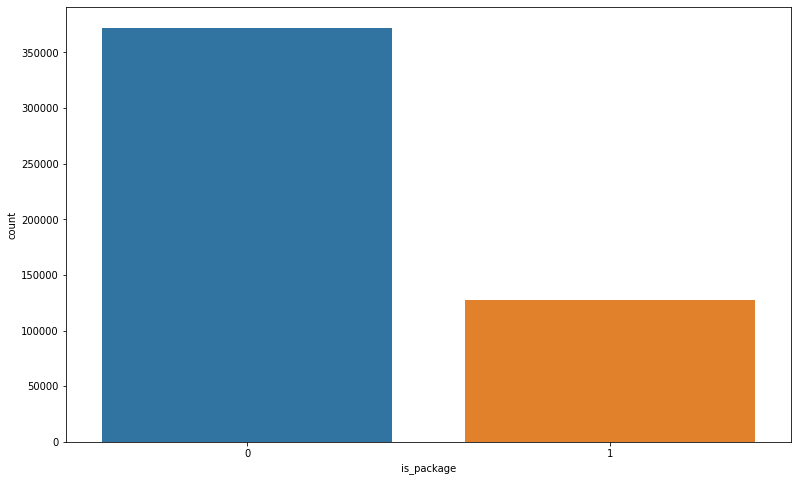

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_package',data=df, order=[0,1], ax=ax)

In [8]:
df['srch_ci']=pd.to_datetime(df['srch_ci'])
df['srch_co']=pd.to_datetime(df['srch_co'])
df['date_time']=pd.to_datetime(df['date_time'])

df['check_in_month']=df['srch_ci'].apply(lambda x:x.month)
df['date_time_month']=df['date_time'].apply(lambda x:x.month)

<AxesSubplot:xlabel='date_time_month', ylabel='count'>

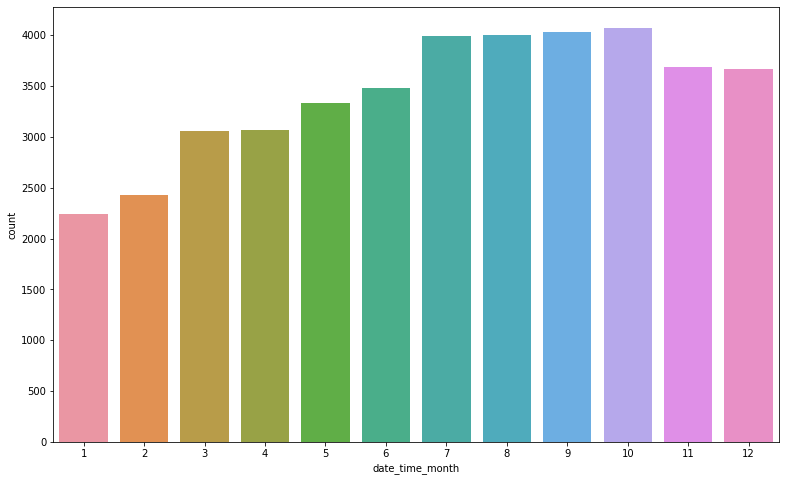

In [9]:
#Plotting month distribution
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('date_time_month',data=df[df["is_booking"] == 1],order=list(range(1,13)),ax=ax)

In [10]:
df['time_delta']=(df['srch_co']-df['srch_ci'])
df['days_spent']=df['time_delta'].dt.days
df=df.drop(columns=['time_delta'])

In [11]:
df.isnull().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    182317
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                         507
srch_co                         507
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
check_in_month                  507
date_time_month                   0
days_spent                      507
dtype: int64

In [12]:
df=pd.DataFrame(df)

In [13]:
df=df.dropna(subset=['srch_ci'])
df.isnull().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    182127
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                           0
srch_co                           0
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
check_in_month                    0
date_time_month                   0
days_spent                        0
dtype: int64

In [14]:
dist_mean=df['orig_destination_distance'].mean()
df['orig_destination_distance']=df['orig_destination_distance'].fillna(dist_mean)

In [15]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,check_in_month,date_time_month,days_spent
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,1,0,3,2,50,628,1,8.0,8,4.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,1,1,2,50,628,1,8.0,8,4.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,1,0,1,2,50,628,1,8.0,8,4.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,1,0,1,2,50,1457,80,11.0,8,5.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,1,0,1,2,50,1457,21,11.0,8,5.0


In [ ]:
#-- Our logic for encoding

In [18]:
df['user_location_country'] = df['user_location_country'].replace({66: 66, 205: 205, 46: 46, 77: 77, 1: 1, 215: 215},0)

In [19]:

selected_labels = [174, 354, 442, 348, 220, 462, 155, 135, 258, 448, 184, 363, 226, 311, 337, 153, 351, 318, 331, 385, 356, 314]

df['user_location_region'] = df['user_location_region'].apply(lambda x: x if x in selected_labels else 0)

In [20]:
labels_to_keep = [48862, 25315, 24103, 36086, 35390, 14703, 49272, 4687, 26232, 2086,
                   27655, 51733, 5938, 2428, 16634, 2037, 47997, 31371, 42300, 46963,
                   76, 21728, 22202, 28620, 48951]
df['user_location_city'] = np.where(df['user_location_city'].isin(labels_to_keep), 1, 0)

In [ ]:
df.isnull().sum()

In [ ]:
odd_std=df['orig_destination_distance'].std()
odd_mean=df['orig_destination_distance'].mean()

df['orig_destination_distance']=(df['orig_destination_distance']-odd_mean)/odd_std

In [ ]:
print(df['orig_destination_distance'].mean())
print(df['orig_destination_distance'].std())

In [ ]:
ds_std=df['days_spent'].std()
ds_mean=df['days_spent'].mean()
df['days_spent']=(df['days_spent']-ds_mean)/ds_std

In [ ]:
print(df['days_spent'].mean())
print(df['days_spent'].std())

In [ ]:
ad_mean=df['srch_adults_cnt'].mean()
ad_std=df['srch_adults_cnt'].std()
ch_mean=df['srch_children_cnt'].mean()
ch_std=df['srch_children_cnt'].std()


cnt_mean=df['cnt'].mean()
cnt_std=df['cnt'].std()

room_mean=df['srch_rm_cnt'].mean()
room_std=df['srch_rm_cnt'].std()

df['srch_adults_cnt']=(df['srch_adults_cnt']-ad_mean)/ad_std
df['srch_children_cnt']=(df['srch_children_cnt']-ch_mean)/ch_std
df['cnt']=(df['cnt']-cnt_mean)/cnt_std
df['srch_rm_cnt']=(df['srch_rm_cnt']-room_mean)/room_std



print(df['srch_adults_cnt'].mean())
print(df['srch_children_cnt'].std())
print(df['srch_adults_cnt'].mean())
print(df['srch_children_cnt'].std())

print(df['cnt'].mean())
print(df['cnt'].std())
print(df['srch_rm_cnt'].mean())
print(df['srch_rm_cnt'].std())

print(df.columns)

In [ ]:
categorical_columns=['hotel_continent', 'hotel_country', 'hotel_market','user_location_country','user_location_region', 'user_location_city','site_name','posa_continent','check_in_month','date_time_month','channel']
alternative_df=df.drop(columns=categorical_columns)
df=pd.get_dummies(df,columns=categorical_columns)

In [ ]:
column_drops=['date_time','srch_ci','srch_co','user_id']
df=df.drop(columns=column_drops)

In [ ]:
y=df['hotel_cluster']

In [ ]:
x=df.drop(columns='hotel_cluster')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [ ]:
#_--------------------------------------Models-------------------------_#

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

In [ ]:
most_important=rf_model.feature_importances_
index_list=sorted(range(len(rf_model.feature_importances_)),key=lambda i: rf_model.feature_importances_[i])[-10:]
impFeatures=list(x.columns[index_list])

In [ ]:
for i in index_list:
    print (round(rf_model.feature_importances_[i],3))
print(impFeatures)